## About the Data Set

This research aimed at the case of customers default payments and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 
Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. 


### Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm
import random
import os
from imblearn.over_sampling import SMOTE
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats import descriptivestats
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,r2_score,accuracy_score,classification_report,recall_score,f1_score,precision_recall_curve,precision_score

In [2]:
df = pd.read_excel(r"D:\Capston Project\Credit_card_clients.xls", header=1)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [3]:
df.shape

(30000, 25)

In [4]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["ID"],inplace = True)

In [8]:
df =df.rename(columns={'default payment next month': "Defaulter",'BILL_AMT1':"April_Bill",
                       'BILL_AMT2':"May_Bill",'BILL_AMT3':'June_Bill','BILL_AMT4':'July_Bill',"BILL_AMT5":'Aug_Bill','BILL_AMT6':"Sep_Bill",
                      'PAY_AMT1':'Sep_Pay','PAY_AMT2':'Aug_Pay','PAY_AMT3':'July_Pay','PAY_AMT4':'June_Pay',
                       'PAY_AMT5':'May_Pay','PAY_AMT6':'April_Pay'})


In [9]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  July_Bill  Aug_Bill  Sep_Bill  Sep_Pay  Aug_Pay  July_Pay  \
0         -2  ...          0         0         0        0      689         0   
1          0  ...       3272      3455      3261        0     1000      1000   
2          0  ...      14331     14948     15549     1518     1500      1000   
3          0  ...      28314     28959     29547     2000     2019      1200   
4          0  ...      20940     19146     19131     2000    36681     10000   
...      ...  ...        ...       ...       ...      ...      ...       ...   
29995      0  ...      88004     31237     15980     8500    20000      5003   
29996      0  ...       8979      5190         0     1837     3526      8998   
29997      0  ...      20878     20582     19357        0        0     22000   
29998      0  ...      52774     11855     48944    85900     3409      1178   
29999      0  ...      36535     32428     15313     2078     1800      1430   

       June_Pay  May_Pay  April_Pay  Defaulter  
0             0        0          0          1  
1          1000        0       2000          1  
2          1000     1000       5000          0  
3          1100     1069       1000          0  
4          9000      689        679          0  
...         ...      ...        ...        ...  
29995      3047     5000       1000          0  
29996       129        0          0          0  
29997      4200     2000       3100          1  
29998      1926    52964       1804          1  
29999      1000     1000       1000          1  

[30000 rows x 24 columns]

In [10]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'April_Bill', 'May_Bill',
       'June_Bill', 'July_Bill', 'Aug_Bill', 'Sep_Bill', 'Sep_Pay', 'Aug_Pay',
       'July_Pay', 'June_Pay', 'May_Pay', 'April_Pay', 'Defaulter'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   30000 non-null  int64
 1   SEX         30000 non-null  int64
 2   EDUCATION   30000 non-null  int64
 3   MARRIAGE    30000 non-null  int64
 4   AGE         30000 non-null  int64
 5   PAY_0       30000 non-null  int64
 6   PAY_2       30000 non-null  int64
 7   PAY_3       30000 non-null  int64
 8   PAY_4       30000 non-null  int64
 9   PAY_5       30000 non-null  int64
 10  PAY_6       30000 non-null  int64
 11  April_Bill  30000 non-null  int64
 12  May_Bill    30000 non-null  int64
 13  June_Bill   30000 non-null  int64
 14  July_Bill   30000 non-null  int64
 15  Aug_Bill    30000 non-null  int64
 16  Sep_Bill    30000 non-null  int64
 17  Sep_Pay     30000 non-null  int64
 18  Aug_Pay     30000 non-null  int64
 19  July_Pay    30000 non-null  int64
 20  June_Pay    30000 non-null  

In [12]:
lt = df['LIMIT_BAL'].value_counts()

In [13]:
lt[0:15]

LIMIT_BAL
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
140000     749
230000     737
70000      731
210000     730
130000     729
Name: count, dtype: int64

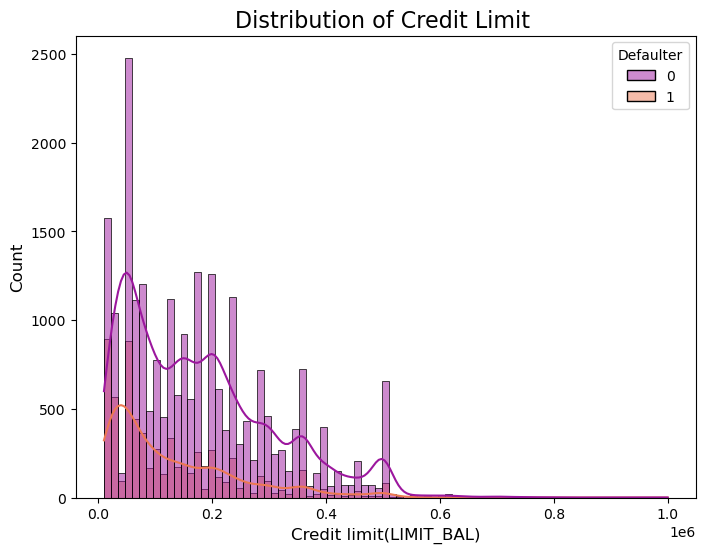

In [14]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x="LIMIT_BAL", hue=df.Defaulter, kde = True, palette='plasma')
plt.title("Distribution of Credit Limit ", fontsize = 16)
plt.xlabel('Credit limit(LIMIT_BAL)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()

In [15]:
ed = df['EDUCATION'].value_counts()

In [16]:
print({1:'graduate school',2:'university',3:'High School',4:"Others"},'\n',ed)

{1: 'graduate school', 2: 'university', 3: 'High School', 4: 'Others'} 
 EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


In [17]:
ed1 =round( df['EDUCATION'].value_counts(normalize=True)*100,2)
print({1:'graduate school',2:'university',3:'High School',4:"Others"},'\n',ed1)

{1: 'graduate school', 2: 'university', 3: 'High School', 4: 'Others'} 
 EDUCATION
2    46.77
1    35.28
3    16.39
4     1.56
Name: proportion, dtype: float64


In [18]:
sex = df['SEX'].value_counts()

In [19]:
print({1:'Male',2:"Female"},'\n',sex)

{1: 'Male', 2: 'Female'} 
 SEX
2    18112
1    11888
Name: count, dtype: int64


In [20]:
sex1=round( df['SEX'].value_counts(normalize=True)*100,2)
print({1:'Male',2:"Female"},'\n',sex1)

{1: 'Male', 2: 'Female'} 
 SEX
2    60.37
1    39.63
Name: proportion, dtype: float64


In [21]:
mg= df['MARRIAGE'].value_counts()

In [22]:
print({1:'Married',2:'Unmarried',3:'Single'},'\n',mg)

{1: 'Married', 2: 'Unmarried', 3: 'Single'} 
 MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


In [23]:
mg1=round( df['MARRIAGE'].value_counts(normalize=True)*100,2)
print({1:'Married',2:'Unmarried',3:'Single'},'\n',mg1)

{1: 'Married', 2: 'Unmarried', 3: 'Single'} 
 MARRIAGE
2    53.21
1    45.53
3     1.26
Name: proportion, dtype: float64


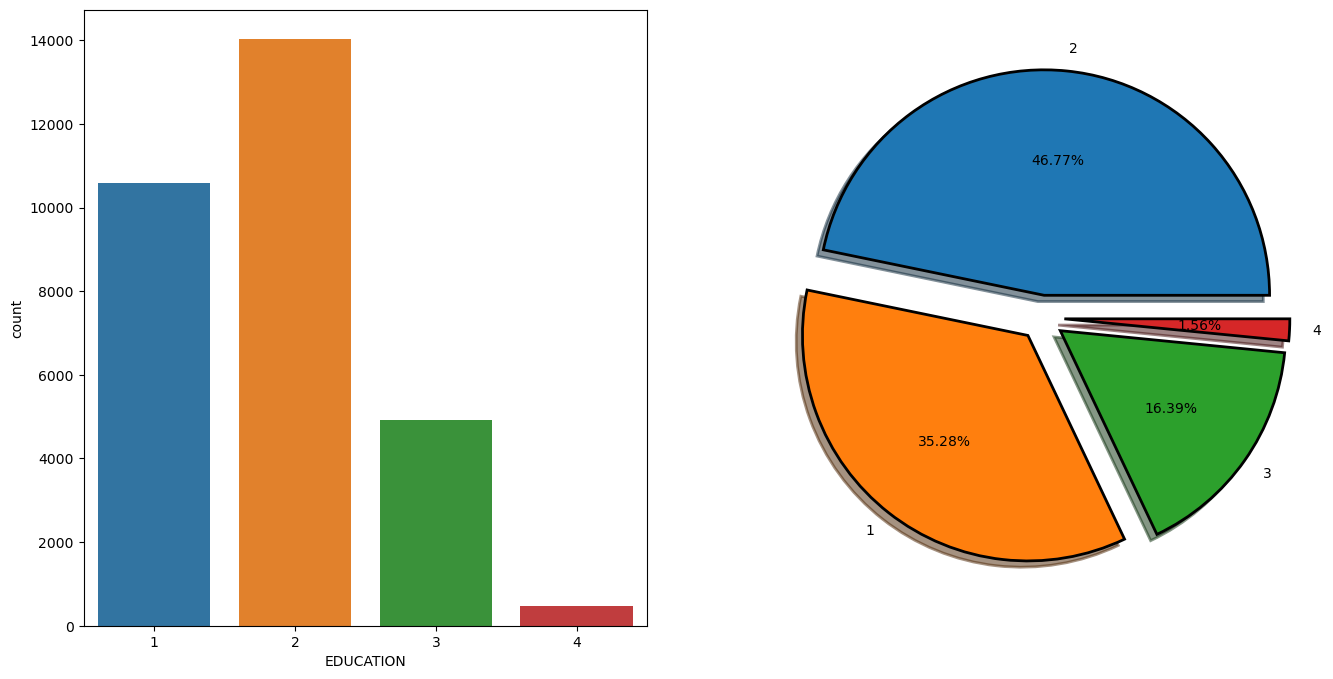

In [24]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.countplot(x='EDUCATION',data =df)

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1)
plt.pie(df['EDUCATION'].value_counts(),labels= ed1.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

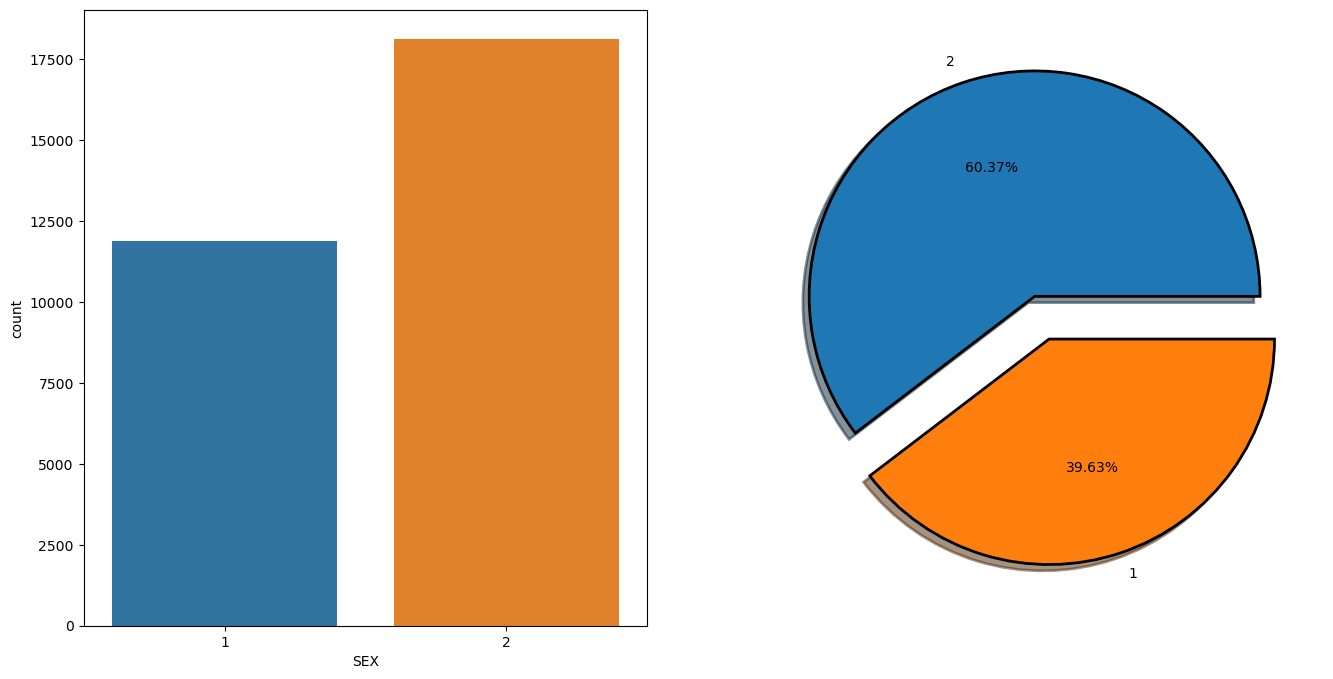

In [25]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.countplot(x='SEX',data =df,)

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1)
plt.pie(df['SEX'].value_counts(),labels= sex1.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

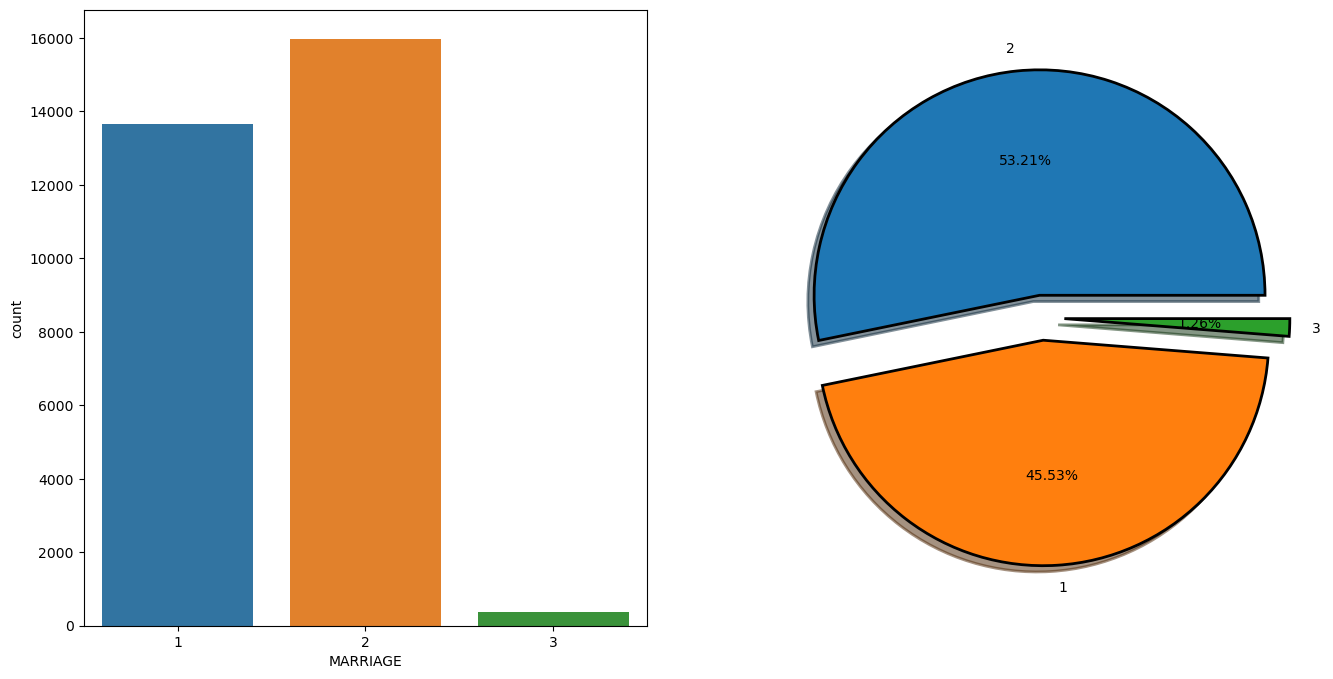

In [26]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.countplot(x='MARRIAGE',data =df,)

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1)
plt.pie(df['MARRIAGE'].value_counts(),labels= mg1.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

In [27]:
df.groupby('SEX',as_index=False)['Defaulter'].value_counts().sort_values('SEX',ascending = True)

SEX  Defaulter  count
0    1          0   9015
1    1          1   2873
2    2          0  14349
3    2          1   3763

Text(0, 0.5, 'Credit limit(LIMIT_BAL)')

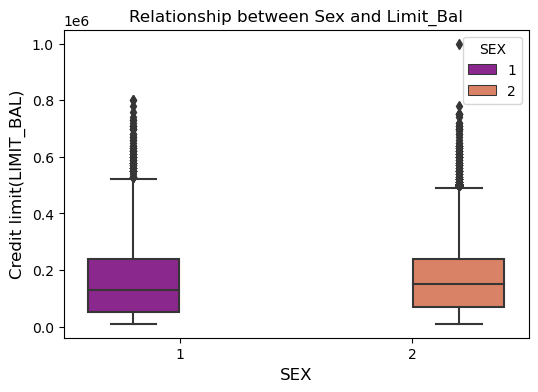

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df, x= 'SEX',y ='LIMIT_BAL', hue='SEX',palette='plasma')
plt.title('Relationship between Sex and Limit_Bal')
plt.xlabel("SEX", fontsize = 12)
plt.ylabel('Credit limit(LIMIT_BAL)', fontsize =12)

In [29]:
df['AGE'].value_counts(ascending=False)[:10]

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
Name: count, dtype: int64

In [30]:
a2 = df[['AGE', 'Defaulter']].groupby(['AGE'], axis=0).sum().sort_values('Defaulter', ascending=False)[:10]

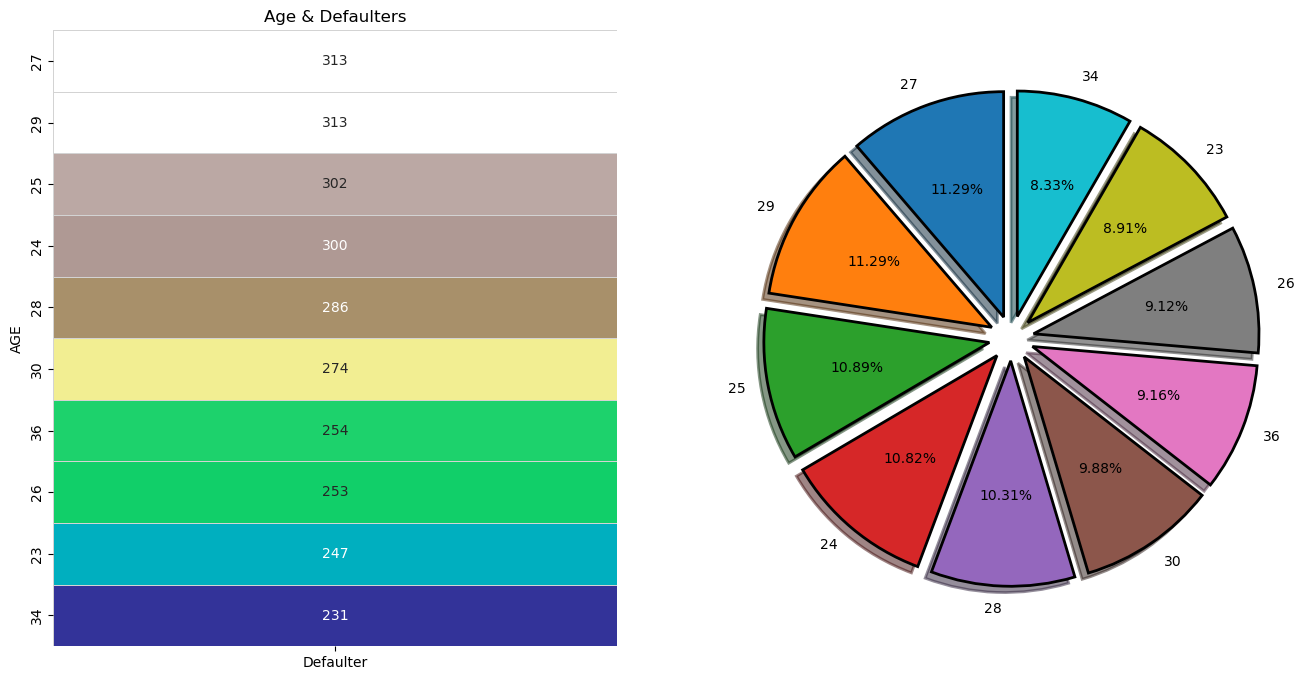

In [31]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
plt.title("Age & Defaulters")
sns.heatmap(a2, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', )

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(a2['Defaulter'],labels= a2.index,autopct="%.2f%%", shadow=True,startangle=90,wedgeprops= wp,explode= explode)
plt.show()


In [32]:
dia = px.histogram(df,x = 'AGE',
                  labels = {'Make':"All AGE"},
                  color = 'Defaulter',
                  title = "Age VS Defaulter")

In [33]:
dia.show()

In [34]:
dia = px.histogram(df,x = 'AGE',
                  labels = {'Make':"All AGE"},
                  color = 'LIMIT_BAL',
                  title = "Age VS LIMIT_BAL")
dia.show()

In [35]:
descriptivestats.describe(df)

D:\Anaconda\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



LIMIT_BAL           SEX      EDUCATION      MARRIAGE  \
nobs                30000.000000  30000.000000   3.000000e+04  30000.000000   
missing                 0.000000      0.000000   0.000000e+00      0.000000   
mean               167484.322667      1.603733   1.842267e+00      1.557267   
std_err                 4.324922      0.000016   2.481648e-05      0.000017   
upper_ci           167492.799358      1.603765   1.842315e+00      1.557301   
lower_ci           167475.845975      1.603701   1.842218e+00      1.557233   
std                129747.661567      0.489129   7.444945e-01      0.521405   
iqr                190000.000000      1.000000   1.000000e+00      1.000000   
iqr_normal         140847.210758      0.741301   7.413011e-01      0.741301   
mad                104957.000778      0.478479   5.943595e-01      0.507447   
mad_normal         131544.092885      0.599684   7.449192e-01      0.635991   
coef_var                0.774685      0.304994   4.041187e-01      0.334820   
range              990000.000000      1.000000   3.000000e+00      2.000000   
max               1000000.000000      2.000000   4.000000e+00      3.000000   
min                 10000.000000      1.000000   1.000000e+00      1.000000   
skew                    0.992817     -0.424162   4.896952e-01      0.036152   
kurtosis                3.535974      1.179914   2.638258e+00      1.607473   
jarque_bera          5287.515651   5040.461123   1.362579e+03   2430.448784   
jarque_bera_pval        0.000000      0.000000  1.317635e-296      0.000000   
mode                50000.000000      2.000000   2.000000e+00      2.000000   
mode_freq               0.112167      0.603733   4.676667e-01      0.532133   
median             140000.000000      2.000000   2.000000e+00      2.000000   
1%                  10000.000000      1.000000   1.000000e+00      1.000000   
5%                  20000.000000      1.000000   1.000000e+00      1.000000   
10%                 30000.000000      1.000000   1.000000e+00      1.000000   
25%                 50000.000000      1.000000   1.000000e+00      1.000000   
50%                140000.000000      2.000000   2.000000e+00      2.000000   
75%                240000.000000      2.000000   2.000000e+00      2.000000   
90%                360000.000000      2.000000   3.000000e+00      2.000000   
95%                430000.000000      2.000000   3.000000e+00      2.000000   
99%                500000.000000      2.000000   4.000000e+00      3.000000   

                           AGE         PAY_0         PAY_2         PAY_3  \
nobs              30000.000000  30000.000000  30000.000000  30000.000000   
missing               0.000000      0.000000      0.000000      0.000000   
mean                 35.485500     -0.016700     -0.133767     -0.166200   
std_err               0.000307      0.000037      0.000040      0.000040   
upper_ci             35.486102     -0.016627     -0.133688     -0.166122   
lower_ci             35.484898     -0.016773     -0.133845     -0.166278   
std                   9.217904      1.123802      1.197186      1.196868   
iqr                  13.000000      1.000000      1.000000      1.000000   
iqr_normal            9.636914      0.741301      0.741301      0.741301   
mad                   7.546118      0.737531      0.819920      0.829478   
mad_normal            9.457656      0.924358      1.027618      1.039597   
coef_var              0.259765    -67.293505     -8.949808     -7.201369   
range                58.000000     10.000000     10.000000     10.000000   
max                  79.000000      8.000000      8.000000      8.000000   
min                  21.000000     -2.000000     -2.000000     -2.000000   
skew                  0.732209      0.731938      0.790525      0.840640   
kurtosis              3.044096      5.720062      4.569956      5.083888   
jarque_bera        2683.082544  11927.087578   6205.605129   8961.615360   
jarque_bera_pval      0.000000      0.000000      

In [36]:
df.describe().T

count           mean            std       min       25%  \
LIMIT_BAL   30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX         30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION   30000.0       1.842267       0.744494       1.0      1.00   
MARRIAGE    30000.0       1.557267       0.521405       1.0      1.00   
AGE         30000.0      35.485500       9.217904      21.0     28.00   
PAY_0       30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2       30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3       30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4       30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5       30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6       30000.0      -0.291100       1.149988      -2.0     -1.00   
April_Bill  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
May_Bill    30000.0   49179.075167   71173.768783  -69777.0   2984.75   
June_Bill   30000.0   47013.154800   69349.387427 -157264.0   2666.25   
July_Bill   30000.0   43262.948967   64332.856134 -170000.0   2326.75   
Aug_Bill    30000.0   40311.400967   60797.155770  -81334.0   1763.00   
Sep_Bill    30000.0   38871.760400   59554.107537 -339603.0   1256.00   
Sep_Pay     30000.0    5663.580500   16563.280354       0.0   1000.00   
Aug_Pay     30000.0    5921.163500   23040.870402       0.0    833.00   
July_Pay    30000.0    5225.681500   17606.961470       0.0    390.00   
June_Pay    30000.0    4826.076867   15666.159744       0.0    296.00   
May_Pay     30000.0    4799.387633   15278.305679       0.0    252.50   
April_Pay   30000.0    5215.502567   17777.465775       0.0    117.75   
Defaulter   30000.0       0.221200       0.415062       0.0      0.00   

                 50%        75%        max  
LIMIT_BAL   140000.0  240000.00  1000000.0  
SEX              2.0       2.00        2.0  
EDUCATION        2.0       2.00        4.0  
MARRIAGE         2.0       2.00        3.0  
AGE             34.0      41.00       79.0  
PAY_0            0.0       0.00        8.0  
PAY_2            0.0       0.00        8.0  
PAY_3            0.0       0.00        8.0  
PAY_4            0.0       0.00        8.0  
PAY_5            0.0       0.00        8.0  
PAY_6            0.0       0.00        8.0  
April_Bill   22381.5   67091.00   964511.0  
May_Bill     21200.0   64006.25   983931.0  
June_Bill    20088.5   60164.75  1664089.0  
July_Bill    19052.0   54506.00   891586.0  
Aug_Bill     18104.5   50190.50   927171.0  
Sep_Bill     17071.0   49198.25   961664.0  
Sep_Pay       2100.0    5006.00   873552.0  
Aug_Pay       2009.0    5000.00  1684259.0  
July_Pay      1800.0    4505.00   896040.0  
June_Pay      1500.0    4013.25   621000.0  
May_Pay       1500.0    4031.50   426529.0  
April_Pay     1500.0    4000.00   528666.0  
Defaulter        0.0       0.00        1.0

In [37]:
cor = df.corr().round(2)
cor

LIMIT_BAL   SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
LIMIT_BAL        1.00  0.02      -0.23     -0.11  0.14  -0.27  -0.30  -0.29   
SEX              0.02  1.00       0.01     -0.03 -0.09  -0.06  -0.07  -0.07   
EDUCATION       -0.23  0.01       1.00     -0.14  0.18   0.11   0.13   0.12   
MARRIAGE        -0.11 -0.03      -0.14      1.00 -0.41   0.02   0.02   0.03   
AGE              0.14 -0.09       0.18     -0.41  1.00  -0.04  -0.05  -0.05   
PAY_0           -0.27 -0.06       0.11      0.02 -0.04   1.00   0.67   0.57   
PAY_2           -0.30 -0.07       0.13      0.02 -0.05   0.67   1.00   0.77   
PAY_3           -0.29 -0.07       0.12      0.03 -0.05   0.57   0.77   1.00   
PAY_4           -0.27 -0.06       0.12      0.03 -0.05   0.54   0.66   0.78   
PAY_5           -0.25 -0.06       0.10      0.03 -0.05   0.51   0.62   0.69   
PAY_6           -0.24 -0.04       0.09      0.03 -0.05   0.47   0.58   0.63   
April_Bill       0.29 -0.03       0.02     -0.03  0.06   0.19   0.23   0.21   
May_Bill         0.28 -0.03       0.01     -0.03  0.05   0.19   0.24   0.24   
June_Bill        0.28 -0.02       0.01     -0.03  0.05   0.18   0.22   0.23   
July_Bill        0.29 -0.02      -0.01     -0.03  0.05   0.18   0.22   0.23   
Aug_Bill         0.30 -0.02      -0.01     -0.03  0.05   0.18   0.22   0.23   
Sep_Bill         0.29 -0.02      -0.01     -0.03  0.05   0.18   0.22   0.22   
Sep_Pay          0.20 -0.00      -0.04     -0.00  0.03  -0.08  -0.08   0.00   
Aug_Pay          0.18 -0.00      -0.03     -0.01  0.02  -0.07  -0.06  -0.07   
July_Pay         0.21 -0.01      -0.04     -0.00  0.03  -0.07  -0.06  -0.05   
June_Pay         0.20 -0.00      -0.04     -0.01  0.02  -0.06  -0.05  -0.05   
May_Pay          0.22 -0.00      -0.05     -0.00  0.02  -0.06  -0.04  -0.04   
April_Pay        0.22 -0.00      -0.04     -0.01  0.02  -0.06  -0.04  -0.04   
Defaulter       -0.15 -0.04       0.03     -0.03  0.01   0.32   0.26   0.24   

            PAY_4  PAY_5  ...  July_Bill  Aug_Bill  Sep_Bill  Sep_Pay  \
LIMIT_BAL   -0.27  -0.25  ...       0.29      0.30      0.29     0.20   
SEX         -0.06  -0.06  ...      -0.02     -0.02     -0.02    -0.00   
EDUCATION    0.12   0.10  ...      -0.01     -0.01     -0.01    -0.04   
MARRIAGE     0.03   0.03  ...      -0.03     -0.03     -0.03    -0.00   
AGE         -0.05  -0.05  ...       0.05      0.05      0.05     0.03   
PAY_0        0.54   0.51  ...       0.18      0.18      0.18    -0.08   
PAY_2        0.66   0.62  ...       0.22      0.22      0.22    -0.08   
PAY_3        0.78   0.69  ...       0.23      0.23      0.22     0.00   
PAY_4        1.00   0.82  ...       0.25      0.24      0.24    -0.01   
PAY_5        0.82   1.00  ...       0.27      0.27      0.26    -0.01   
PAY_6        0.72   0.82  ...       0.27      0.29      0.29    -0.00   
April_Bill   0.20   0.21  ...       0.86      0.83      0.80     0.14   
May_Bill     0.23   0.23  ...       0.89      0.86      0.83     0.28   
June_Bill    0.24   0.24  ...       0.92      0.88      0.85     0.24   
July_Bill    0.25   0.27  ...       1.00      0.94      0.90     0.23   
Aug_Bill     0.24   0.27  ...       0.94      1.00      0.95     0.22   
Sep_Bill     0.24   0.26  ...       0.90      0.95      1.00     0.20   
Sep_Pay     -0.01  -0.01  ...       0.23      0.22      0.20     1.00   
Aug_Pay     -0.00  -0.00  ...       0.21      0.18      0.17     0.29   
July_Pay    -0.07   0.01  ...       0.30      0.25      0.23     0.25   
June_Pay    -0.04  -0.06  ...       0.13      0.29      0.25     0.20   
May_Pay     -0.03  -0.03  ...       0.16      0.14      0.31     0.15   
April_Pay   -0.03  -0.02  ...       0.18      0.16      0.12     0.19   
Defaulter    0.22   0.20  ...      -0.01     -0.01     -0.01    -0.07   

            Aug_Pay  July_Pay  June_Pay  May_Pay  April_Pay  Defaulter  
LIMIT_BAL      0.18      0.21      0.20     0.22       0.22      -0.15  
SEX           -0.00     -0.01     -0.00    -0.00      -0.00     

<AxesSubplot:>

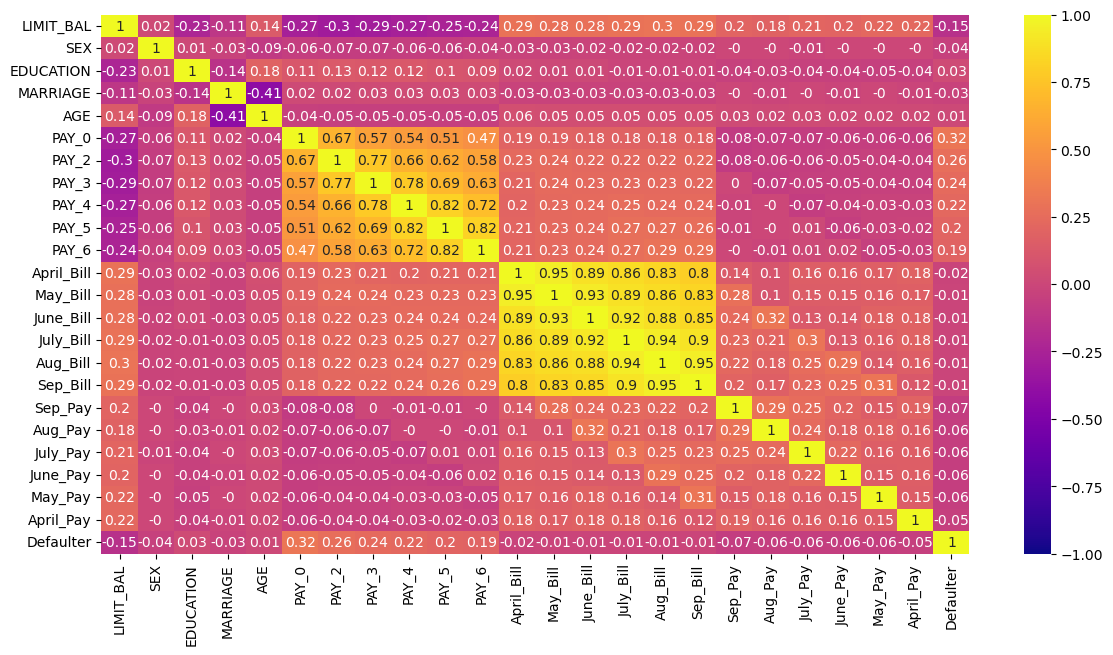

In [38]:
fig, ax = plt.subplots(figsize = (14,7))
sns.heatmap(cor,ax=ax,vmin=-1,vmax=1,center=0, annot=True, cmap='plasma')

### Apply PCA to reduce dimensionality of data for highly correlated variables (BILL_AMT)

In [39]:
#from sklearn.decomposition import PCA

In [40]:
#pca = PCA(n_components = 3)
#pca_col = ['April_Bill','May_Bill','June_Bill','July_Bill','Aug_Bill','Sep_Bill']

#pca_features = pca.fit_transform(df[pca_col])

#pca_df = pd.DataFrame(data=pca_features, columns= ['PC1',"PC2",'PC3'])
#pca_df

In [41]:
#df = df.drop(columns=pca_col, axis =1)
#df = pd.concat([df,pca_df], axis=1)
#df

## Correlation after PCA

In [42]:
#cor1 = df.corr().round(2)
#cor1

In [43]:
#fig, ax = plt.subplots(figsize = (14,7))
#sns.heatmap(cor1,ax=ax,vmin=-1,vmax=1,center=0, annot=True, cmap='plasma')

## Univariate analysis for categorical & Numerical variables

In [44]:
cat_col = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
num_col = df[['AGE', 'LIMIT_BAL', 'Sep_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'April_Pay']]

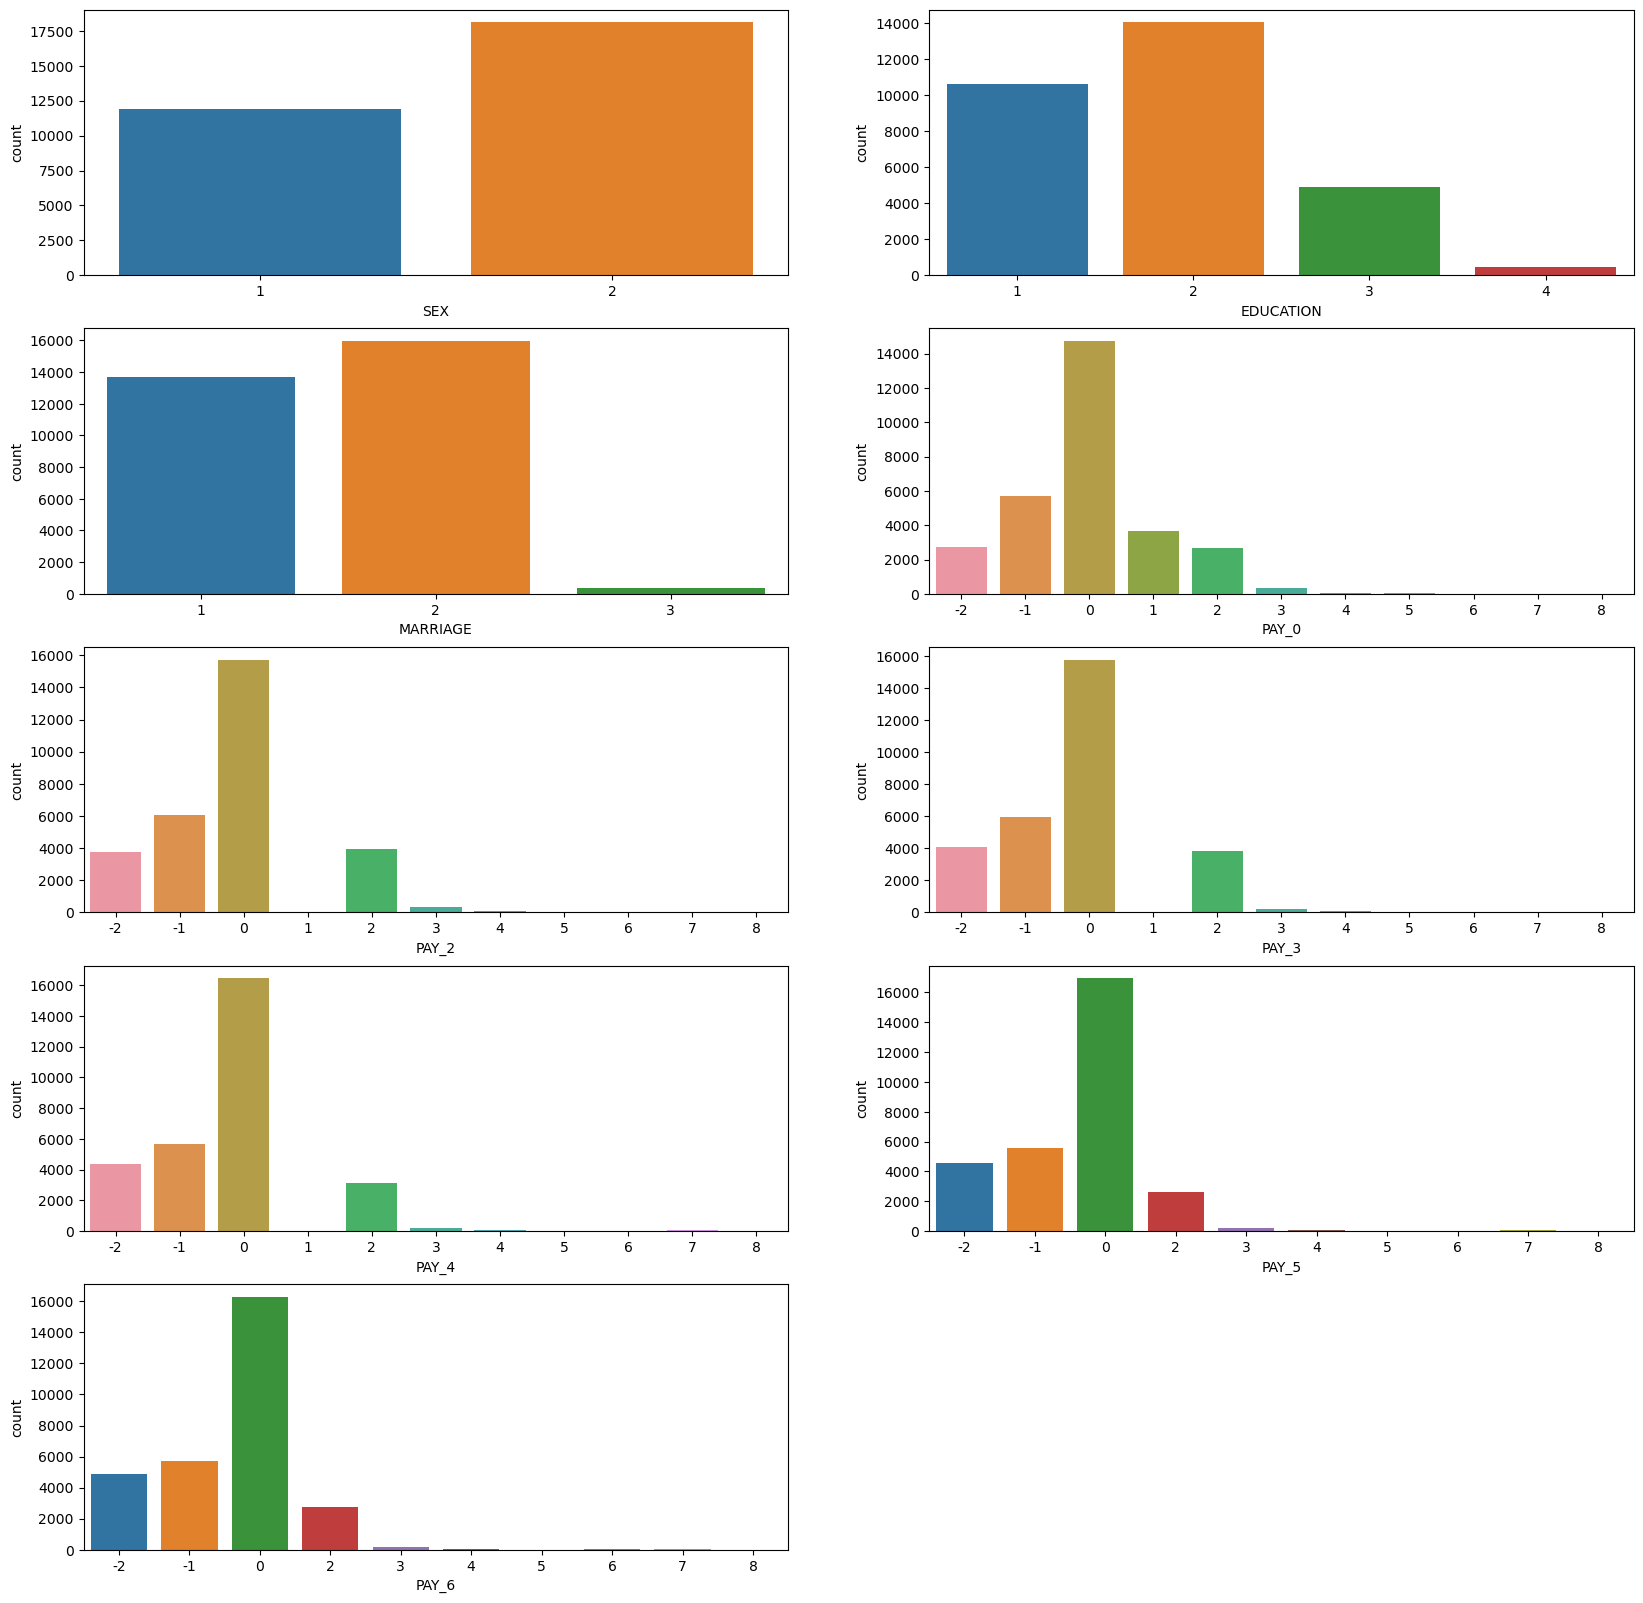

In [45]:
plt.figure(figsize = (20,20))

for i, col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, data = cat_col)

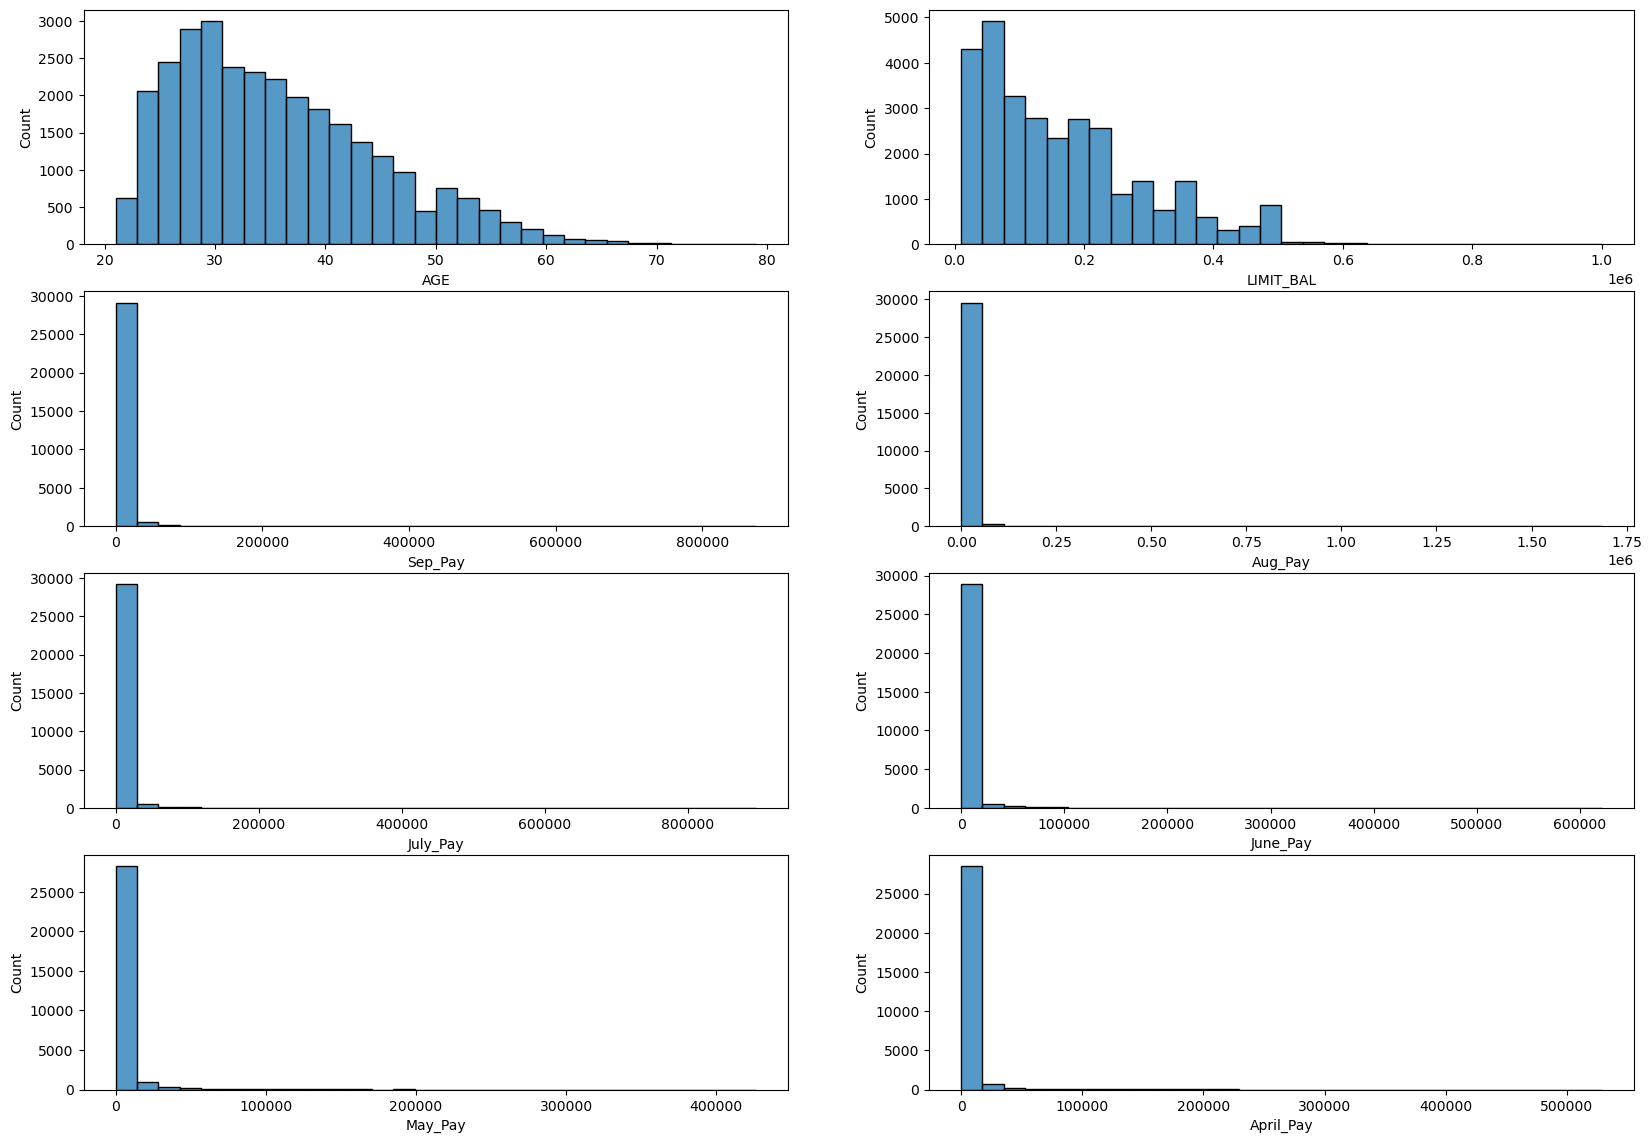

In [46]:
plt.figure(figsize=(20,25))

for i, col in enumerate(num_col):
    plt.subplot(7, 2, i+1)
    sns.histplot(x= col, data=num_col, bins=30)

### The most important column here is Defaulter, which is the output variable (desired target): this will tell us  the Default of credit card clients (binary: ‘yes’,’no’).

In [47]:
dt= df['Defaulter'].value_counts()
print({1:'Yes',0:'No'},'\n',dt)

{1: 'Yes', 0: 'No'} 
 Defaulter
0    23364
1     6636
Name: count, dtype: int64


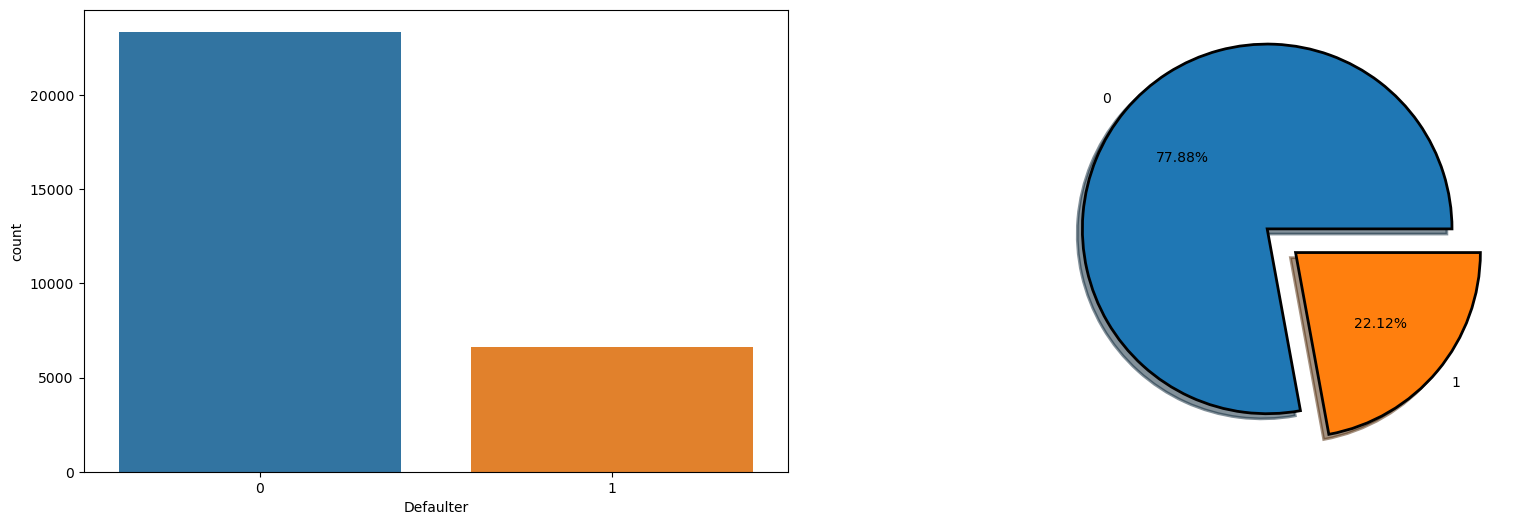

In [48]:
plt.figure(figsize =(20,6))
plt.subplot(1,2,1)
sns.countplot(x='Defaulter',data =df,)

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1)
plt.pie(df['Defaulter'].value_counts(),labels= dt.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

### Feature Engineering

In [49]:
for column in df.columns:
    print(column,df[column].nunique())

LIMIT_BAL 81
SEX 2
EDUCATION 4
MARRIAGE 3
AGE 56
PAY_0 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
April_Bill 22723
May_Bill 22346
June_Bill 22026
July_Bill 21548
Aug_Bill 21010
Sep_Bill 20604
Sep_Pay 7943
Aug_Pay 7899
July_Pay 7518
June_Pay 6937
May_Pay 6897
April_Pay 6939
Defaulter 2


### There was no features with only one value

In [50]:
le = LabelEncoder()

In [51]:
df1=df.copy()

In [52]:
df1['SEX'] = le.fit_transform(df1['SEX'])
df1['EDUCATION'] = le.fit_transform(df1['EDUCATION'])
df1['MARRIAGE'] = le.fit_transform(df1['MARRIAGE'])
df1['PAY_0'] = le.fit_transform(df1['PAY_0'])
df1['PAY_2'] = le.fit_transform(df1['PAY_2'])
df1['PAY_3'] = le.fit_transform(df1['PAY_3'])
df1['PAY_4'] = le.fit_transform(df1['PAY_4'])
df1['PAY_5'] = le.fit_transform(df1['PAY_5'])
df1['PAY_6'] = le.fit_transform(df1['PAY_6'])

In [53]:
#cat_col = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']]
#num_col = df[['AGE', 'LIMIT_BAL', 'Sep_Pay', 'Sep_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'April_Pay']]

In [54]:
df1

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    1          1         0   24      4      4      1      1   
1         120000    1          1         1   26      1      4      2      2   
2          90000    1          1         1   34      2      2      2      2   
3          50000    1          1         0   37      2      2      2      2   
4          50000    0          1         0   57      1      2      1      2   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    0          2         0   39      2      2      2      2   
29996     150000    0          2         1   43      1      1      1      1   
29997      30000    0          1         1   37      6      5      4      1   
29998      80000    0          2         0   41      3      1      2      2   
29999      50000    0          1         0   46      2      2      2      2   

       PAY_5  ...  July_Bill  Aug_Bill  Sep_Bill  Sep_Pay  Aug_Pay  July_Pay  \
0          0  ...          0         0         0        0      689         0   
1          2  ...       3272      3455      3261        0     1000      1000   
2          2  ...      14331     14948     15549     1518     1500      1000   
3          2  ...      28314     28959     29547     2000     2019      1200   
4          2  ...      20940     19146     19131     2000    36681     10000   
...      ...  ...        ...       ...       ...      ...      ...       ...   
29995      2  ...      88004     31237     15980     8500    20000      5003   
29996      2  ...       8979      5190         0     1837     3526      8998   
29997      2  ...      20878     20582     19357        0        0     22000   
29998      2  ...      52774     11855     48944    85900     3409      1178   
29999      2  ...      36535     32428     15313     2078     1800      1430   

       June_Pay  May_Pay  April_Pay  Defaulter  
0             0        0          0          1  
1          1000        0       2000          1  
2          1000     1000       5000          0  
3          1100     1069       1000          0  
4          9000      689        679          0  
...         ...      ...        ...        ...  
29995      3047     5000       1000          0  
29996       129        0          0          0  
29997      4200     2000       3100          1  
29998      1926    52964       1804          1  
29999      1000     1000       1000          1  

[30000 rows x 24 columns]

## Using Standard Scaler

In [55]:
# Normalizing numeric columns
#sc = StandardScaler()

In [56]:
#for i in['AGE', 'LIMIT_BAL', 'Sep_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay','May_Pay', 'April_Pay','PC1','PC2','PC3']:
    #df1[i]=sc.fit_transform(df1[i].values.reshape(-1,1))

In [57]:
df1

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    1          1         0   24      4      4      1      1   
1         120000    1          1         1   26      1      4      2      2   
2          90000    1          1         1   34      2      2      2      2   
3          50000    1          1         0   37      2      2      2      2   
4          50000    0          1         0   57      1      2      1      2   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    0          2         0   39      2      2      2      2   
29996     150000    0          2         1   43      1      1      1      1   
29997      30000    0          1         1   37      6      5      4      1   
29998      80000    0          2         0   41      3      1      2      2   
29999      50000    0          1         0   46      2      2      2      2   

       PAY_5  ...  July_Bill  Aug_Bill  Sep_Bill  Sep_Pay  Aug_Pay  July_Pay  \
0          0  ...          0         0         0        0      689         0   
1          2  ...       3272      3455      3261        0     1000      1000   
2          2  ...      14331     14948     15549     1518     1500      1000   
3          2  ...      28314     28959     29547     2000     2019      1200   
4          2  ...      20940     19146     19131     2000    36681     10000   
...      ...  ...        ...       ...       ...      ...      ...       ...   
29995      2  ...      88004     31237     15980     8500    20000      5003   
29996      2  ...       8979      5190         0     1837     3526      8998   
29997      2  ...      20878     20582     19357        0        0     22000   
29998      2  ...      52774     11855     48944    85900     3409      1178   
29999      2  ...      36535     32428     15313     2078     1800      1430   

       June_Pay  May_Pay  April_Pay  Defaulter  
0             0        0          0          1  
1          1000        0       2000          1  
2          1000     1000       5000          0  
3          1100     1069       1000          0  
4          9000      689        679          0  
...         ...      ...        ...        ...  
29995      3047     5000       1000          0  
29996       129        0          0          0  
29997      4200     2000       3100          1  
29998      1926    52964       1804          1  
29999      1000     1000       1000          1  

[30000 rows x 24 columns]

### MInmax scaler

In [58]:
scaler = MinMaxScaler()

for column in df1.columns:
    if column != 'Defaulter':
        df1[column] = scaler.fit_transform(np.array(df1[column]).reshape(-1,1))

In [59]:
df1 =pd.get_dummies(df1,drop_first=True)
df1.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   0.010101  1.0   0.333333       0.0  0.051724    0.4    0.4    0.1    0.1   
1   0.111111  1.0   0.333333       0.5  0.086207    0.1    0.4    0.2    0.2   
2   0.080808  1.0   0.333333       0.5  0.224138    0.2    0.2    0.2    0.2   
3   0.040404  1.0   0.333333       0.0  0.275862    0.2    0.2    0.2    0.2   
4   0.040404  0.0   0.333333       0.0  0.620690    0.1    0.2    0.1    0.2   

      PAY_5  ...  July_Bill  Aug_Bill  Sep_Bill   Sep_Pay   Aug_Pay  July_Pay  \
0  0.000000  ...   0.160138  0.080648  0.260979  0.000000  0.000409  0.000000   
1  0.222222  ...   0.163220  0.084074  0.263485  0.000000  0.000594  0.001116   
2  0.222222  ...   0.173637  0.095470  0.272928  0.001738  0.000891  0.001116   
3  0.222222  ...   0.186809  0.109363  0.283685  0.002290  0.001199  0.001339   
4  0.222222  ...   0.179863  0.099633  0.275681  0.002290  0.021779  0.011160   

   June_Pay   May_Pay  April_Pay  Defaulter  
0  0.000000  0.000000   0.000000          1  
1  0.001610  0.000000   0.003783          1  
2  0.001610  0.002345   0.009458          0  
3  0.001771  0.002506   0.001892          0  
4  0.014493  0.001615   0.001284          0  

[5 rows x 24 columns]

### Divide the into x & y
Input features

Target varible which is "Defaulter"

In [60]:
x = df1.drop('Defaulter',axis = 1)# inpute features
y = df['Defaulter'] # target variable

### Model Building

Train-Test Split

20% test data - xtest , ytest - actual target variable

80% train data - xtrain,ytrain

xtrain - i/p features for train data

ytrain - target variable for train data

xtest -i/p features for test data

ytest is actual target variable for test data

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [62]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(21000, 23)
xtest shape(9000, 23)
ytrain shape(21000,)
ytest shape(9000,)


In [63]:
xtrain.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
28465   0.232323  1.0   0.000000       0.0  0.327586    0.0    0.0    0.0   
27622   0.040404  1.0   0.000000       0.5  0.034483    0.1    0.1    0.1   
28376   0.040404  1.0   0.333333       0.0  0.258621    0.4    0.4    0.4   
10917   0.191919  1.0   0.666667       0.0  0.568966    0.8    0.7    0.6   
27234   0.232323  0.0   0.000000       0.0  0.241379    0.1    0.1    0.1   

       PAY_4     PAY_5  ...  June_Bill  July_Bill  Aug_Bill  Sep_Bill  \
28465    0.0  0.000000  ...   0.086345   0.160138  0.080648  0.260979   
27622    0.1  0.111111  ...   0.087607   0.164659  0.090375  0.261486   
28376    0.4  0.222222  ...   0.113316   0.205312  0.123859  0.287972   
10917    0.5  0.333333  ...   0.143822   0.256738  0.181193  0.260979   
27234    0.2  0.111111  ...   0.098308   0.176248  0.093902  0.278392   

        Sep_Pay   Aug_Pay  July_Pay  June_Pay   May_Pay  April_Pay  
28465  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  
27622  0.002917  0.001378  0.005357  0.015797  0.001547   0.005637  
28376  0.000000  0.002791  0.000000  0.003227  0.008206   0.000000  
10917  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  
27234  0.002309  0.012953  0.001250  0.021633  0.053389   0.043165  

[5 rows x 23 columns]

In [64]:
df1_train = xtrain.join(ytrain)
df1_test = xtest.join(ytest)

In [65]:
df1_majority_train = df1_train[df1_train.Defaulter == 0]
df1_minority_train = df1_train[df1_train.Defaulter == 1]

print(df1_majority_train.Defaulter.count())
print("-----------")
print(df1_minority_train.Defaulter.count())
print("-----------")
print(df1_train.Defaulter.value_counts())

16324
-----------
4676
-----------
Defaulter
0    16324
1     4676
Name: count, dtype: int64


In [66]:
sm = SMOTE(random_state=42)
X_SMOTE_train, y_SMOTE_train = sm.fit_resample(xtrain, ytrain)
print(y_SMOTE_train.value_counts())

Defaulter
1    16324
0    16324
Name: count, dtype: int64


In [67]:
def helper(model,xtrain,ytrain,xtest,ytest):
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    
    train_acc = accuracy_score(train_pred,ytrain)
    test_acc = accuracy_score(test_pred,ytest)
    prec = precision_score(ytest,test_pred)
    f1 = f1_score(ytest,test_pred)
    recc = recall_score(ytest,test_pred)
    acc_mat= {'Train accuracy':train_acc,"Test accuracy":test_acc,"Precision":prec,"F1 score":f1,"Recall":recc}
    
    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, ytrain))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, ytest))

    print('\n========================================================')
    
    # ploting confusion matrix and roc curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    ConfMatrix = confusion_matrix(test_pred, ytest)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')
    
    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred,ytest)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color = 'r',ls = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    return acc_mat

## Base Model

### Decision tree Classifier

In [68]:
clf = DecisionTreeClassifier()


Training Accuracy Score:  0.6457669688801764
Testing Accuracy Score:  0.7716666666666666
Precision on test data:  0.4707332101047443
Recall on test data:  0.38979591836734695
F1 score on test data:  0.42645827518838963

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.88      0.60      0.71     23959
           1       0.41      0.77      0.54      8689

    accuracy                           0.65     32648
   macro avg       0.65      0.69      0.63     32648
weighted avg       0.76      0.65      0.67     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7377
           1       0.39      0.47      0.43      1623

    accuracy                           0.77      9000
   macro avg       0.63      0.65      0.64      9000
weighted avg       0.79      0.77      0.78      9000




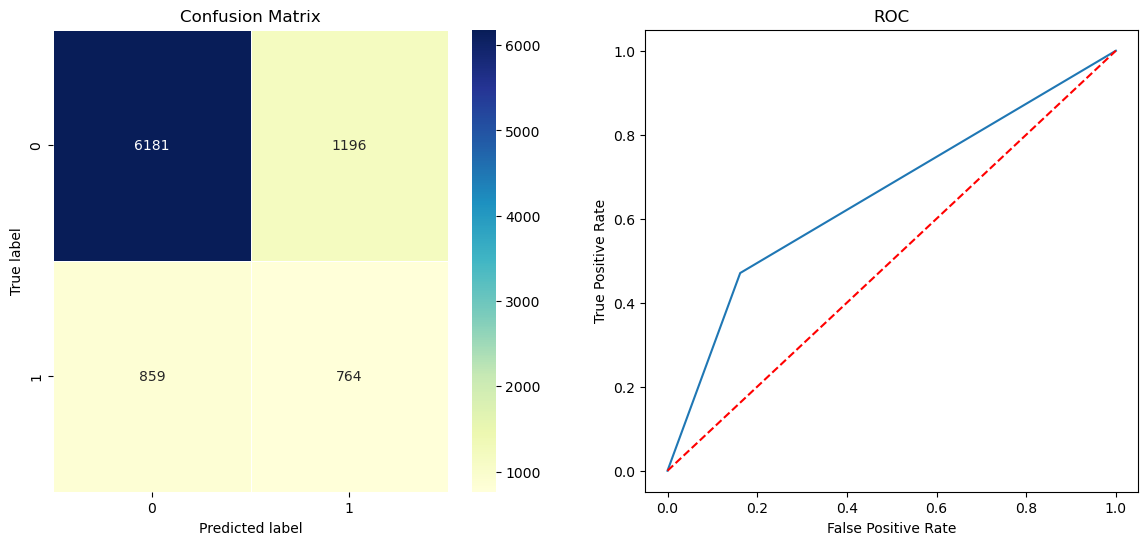

Wall time: 462 ms


In [69]:
%%time
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
clf_tree = clf_tree.fit(X_SMOTE_train, y_SMOTE_train)

Acc_mat_dt = helper(clf_tree,X_SMOTE_train, y_SMOTE_train,xtest, ytest )

In [70]:
feat_imp = clf_tree.feature_importances_

In [71]:
pd.DataFrame({'features':xtrain.columns, 'Feat_Importance':feat_imp}).sort_values(by="Feat_Importance",ascending=False)

features  Feat_Importance
10       PAY_6         0.555857
7        PAY_3         0.292454
5        PAY_0         0.089691
16    Sep_Bill         0.049420
20    June_Pay         0.012578
0    LIMIT_BAL         0.000000
13   June_Bill         0.000000
21     May_Pay         0.000000
19    July_Pay         0.000000
18     Aug_Pay         0.000000
17     Sep_Pay         0.000000
15    Aug_Bill         0.000000
14   July_Bill         0.000000
11  April_Bill         0.000000
12    May_Bill         0.000000
1          SEX         0.000000
9        PAY_5         0.000000
8        PAY_4         0.000000
6        PAY_2         0.000000
4          AGE         0.000000
3     MARRIAGE         0.000000
2    EDUCATION         0.000000
22   April_Pay         0.000000

In [72]:
train_pred = clf_tree.predict(X_SMOTE_train)
test_pred = clf_tree.predict(xtest)

In [73]:
dtc = roc_auc_score(test_pred,ytest)
print('AUC Score:',dtc)

AUC Score: 0.6543038424117323


In [74]:
dtc_as=accuracy_score(ytest,test_pred)
print("Accuracy Score:", dtc_as)

Accuracy Score: 0.7716666666666666


### Random Forest classifier


Training Accuracy Score:  0.8079821122273952
Testing Accuracy Score:  0.7801111111111111
Precision on test data:  0.4954954954954955
Recall on test data:  0.5331632653061225
F1 score on test data:  0.5136397149176701

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     18791
           1       0.73      0.86      0.79     13857

    accuracy                           0.81     32648
   macro avg       0.81      0.82      0.81     32648
weighted avg       0.82      0.81      0.81     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6891
           1       0.53      0.50      0.51      2109

    accuracy                           0.78      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.77      0.78      0.78      9000




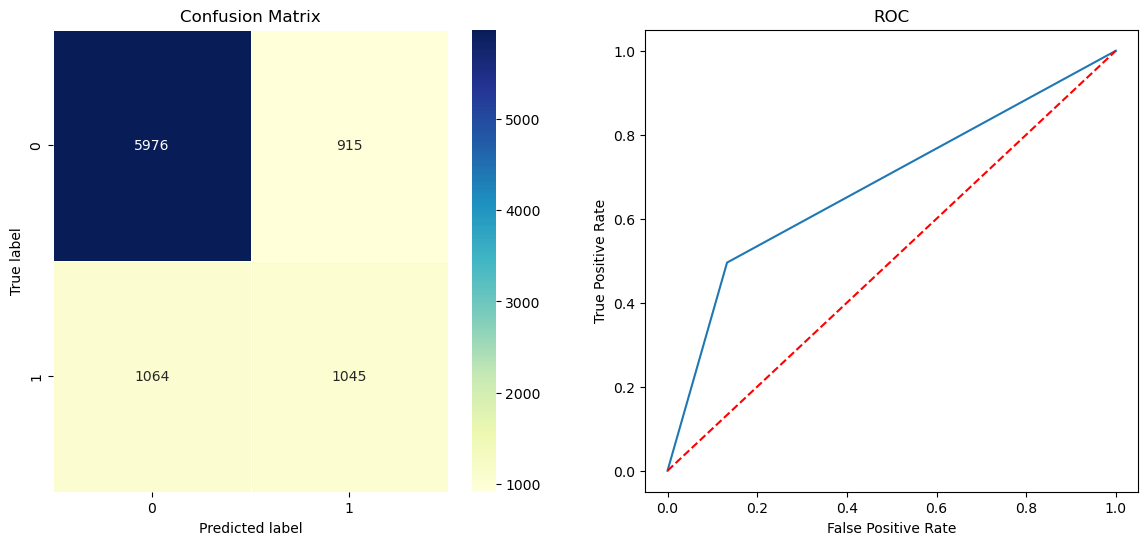

Wall time: 14.8 s


In [75]:
%%time
rfc = RandomForestClassifier(oob_score=True, n_estimators = 100, max_depth=10)
rfc = rfc.fit(X_SMOTE_train, y_SMOTE_train)
Acc_mat_rfc = helper(rfc,X_SMOTE_train, y_SMOTE_train,xtest,ytest)

In [76]:
feat_imp= rfc.feature_importances_

In [77]:
pd.DataFrame({'features':xtrain.columns,'Feat_Importance':feat_imp}).sort_values(by='Feat_Importance',ascending=False)

features  Feat_Importance
5        PAY_0         0.245062
6        PAY_2         0.138431
0    LIMIT_BAL         0.069961
7        PAY_3         0.054543
8        PAY_4         0.051097
10       PAY_6         0.048037
9        PAY_5         0.047408
18     Aug_Pay         0.037218
17     Sep_Pay         0.034759
22   April_Pay         0.032947
20    June_Pay         0.028406
19    July_Pay         0.027469
11  April_Bill         0.026692
21     May_Pay         0.024788
12    May_Bill         0.022375
13   June_Bill         0.020181
4          AGE         0.019852
16    Sep_Bill         0.019761
15    Aug_Bill         0.019674
14   July_Bill         0.017982
2    EDUCATION         0.007191
3     MARRIAGE         0.003394
1          SEX         0.002774

In [78]:
train_pred = rfc.predict(X_SMOTE_train)
test_pred = rfc.predict(xtest)

In [79]:
rf = roc_auc_score(ytest,test_pred)
print('AUC Score:',rf)

AUC Score: 0.6910134508348794


In [80]:
rf_as=accuracy_score(ytest,test_pred)
print("Accuracy Score:",rf_as)

Accuracy Score: 0.7801111111111111


### AdaBoost Classifier


Training Accuracy Score:  0.7886241117373193
Testing Accuracy Score:  0.7764444444444445
Precision on test data:  0.48729227761485827
Recall on test data:  0.5086734693877552
F1 score on test data:  0.4977533699450824

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     18639
           1       0.72      0.84      0.77     14009

    accuracy                           0.79     32648
   macro avg       0.79      0.79      0.79     32648
weighted avg       0.80      0.79      0.79     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6954
           1       0.51      0.49      0.50      2046

    accuracy                           0.78      9000
   macro avg       0.68      0.67      0.68      9000
weighted avg       0.77      0.78      0.77      9000




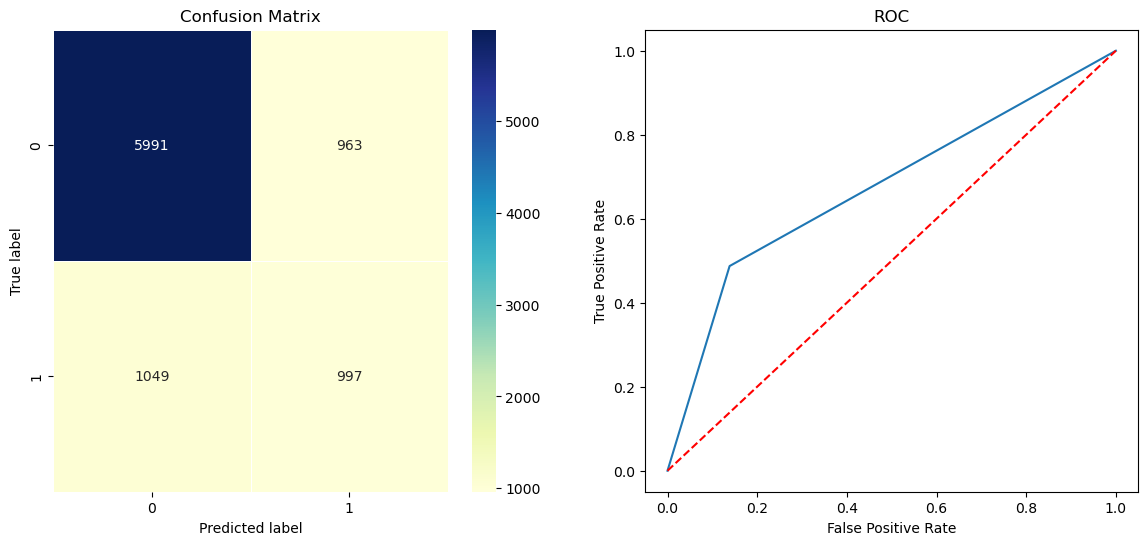

Wall time: 26.9 s


In [81]:
%%time
adc= AdaBoostClassifier(n_estimators = 200, random_state=42)
adc = adc.fit(X_SMOTE_train, y_SMOTE_train)
Acc_mat_adc = helper(adc,X_SMOTE_train, y_SMOTE_train,xtest,ytest)

In [82]:
feat_imp= adc.feature_importances_

In [83]:
pd.DataFrame({'features':xtrain.columns,'Feat_Importance':feat_imp}).sort_values(by='Feat_Importance',ascending=False)

features  Feat_Importance
0    LIMIT_BAL            0.285
10       PAY_6            0.155
4          AGE            0.130
5        PAY_0            0.090
9        PAY_5            0.060
8        PAY_4            0.030
20    June_Pay            0.030
6        PAY_2            0.030
22   April_Pay            0.025
7        PAY_3            0.025
12    May_Bill            0.020
18     Aug_Pay            0.020
19    July_Pay            0.020
17     Sep_Pay            0.015
11  April_Bill            0.015
15    Aug_Bill            0.010
16    Sep_Bill            0.010
21     May_Pay            0.010
3     MARRIAGE            0.005
1          SEX            0.005
13   June_Bill            0.005
2    EDUCATION            0.005
14   July_Bill            0.000

In [84]:
train_pred = adc.predict(X_SMOTE_train)
test_pred = adc.predict(xtest)

In [85]:
adc = roc_auc_score(ytest,test_pred)
print('AUC Score:',adc)

AUC Score: 0.6798338937847868


In [86]:
adc_as=accuracy_score(ytest,test_pred)
print("Accuracy Score:", adc_as)

Accuracy Score: 0.7764444444444445


### Logistic Regression

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Training Accuracy Score:  0.6777137956383239
Testing Accuracy Score:  0.7018888888888889
Precision on test data:  0.38748832866479926
Recall on test data:  0.6352040816326531
F1 score on test data:  0.48134544751594815

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.72      0.66      0.69     17674
           1       0.64      0.69      0.66     14974

    accuracy                           0.68     32648
   macro avg       0.68      0.68      0.68     32648
weighted avg       0.68      0.68      0.68     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      5787
           1       0.64      0.39      0.48      3213

    accuracy                           0.70      9000
   macro avg       0.68      0.63      0.64      9000
weighted avg       0.69      0.70      0.68      9000




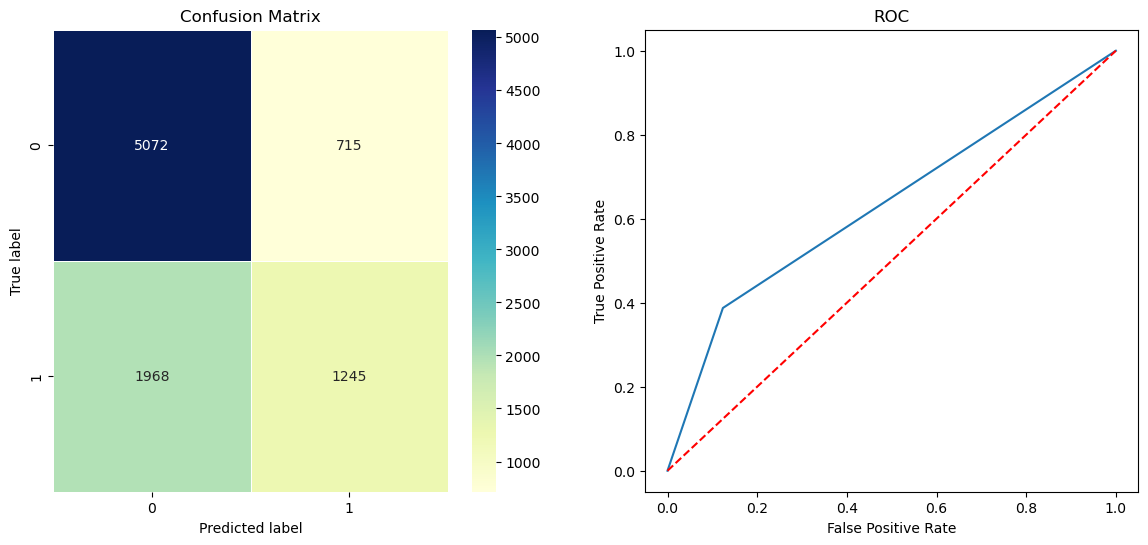

Wall time: 753 ms


In [103]:
%%time
lgr = LogisticRegression()
lgr = lgr.fit(X_SMOTE_train, y_SMOTE_train)
Acc_mat_lgr = helper(lgr,X_SMOTE_train, y_SMOTE_train,xtest,ytest)

In [88]:
train_pred = lgr.predict(X_SMOTE_train)
test_pred = lgr.predict(xtest)

In [89]:
log = roc_auc_score(ytest,test_pred)
print('AUC Score:',log)

AUC Score: 0.6778293135435992


In [90]:
log_as=accuracy_score(ytest,test_pred)
print("Accuracy Score:", log_as)

Accuracy Score: 0.7018888888888889


### Gradient Boosting Classifier


Training Accuracy Score:  0.8812484685126195
Testing Accuracy Score:  0.8131111111111111
Precision on test data:  0.6075851393188855
Recall on test data:  0.4005102040816326
F1 score on test data:  0.4827798277982779

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     18191
           1       0.82      0.93      0.87     14457

    accuracy                           0.88     32648
   macro avg       0.88      0.89      0.88     32648
weighted avg       0.89      0.88      0.88     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7708
           1       0.40      0.61      0.48      1292

    accuracy                           0.81      9000
   macro avg       0.66      0.73      0.68      9000
weighted avg       0.85      0.81      0.83      9000




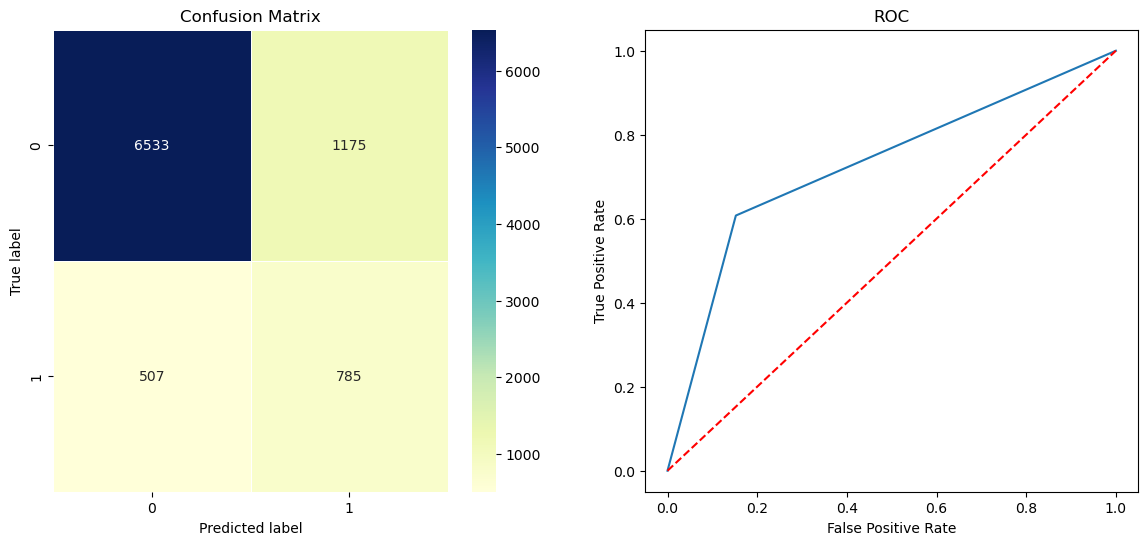

Wall time: 2min 50s


In [91]:
%%time
gbc = GradientBoostingClassifier(n_estimators=500,random_state=52)
gbc = gbc.fit(X_SMOTE_train, y_SMOTE_train)
Acc_mat_gbc = helper(gbc,X_SMOTE_train, y_SMOTE_train,xtest,ytest)

In [92]:
feat_imp = gbc.feature_importances_

In [93]:
pd.DataFrame({'features':xtrain.columns,'Feat_Importance':feat_imp}).sort_values(by='Feat_Importance',ascending=False)

features  Feat_Importance
5        PAY_0         0.370183
0    LIMIT_BAL         0.194483
4          AGE         0.120774
10       PAY_6         0.063429
7        PAY_3         0.028713
6        PAY_2         0.027725
22   April_Pay         0.026265
17     Sep_Pay         0.021805
8        PAY_4         0.019549
9        PAY_5         0.018854
18     Aug_Pay         0.015688
12    May_Bill         0.014779
11  April_Bill         0.013415
19    July_Pay         0.012826
20    June_Pay         0.011119
21     May_Pay         0.010781
13   June_Bill         0.006592
2    EDUCATION         0.006297
16    Sep_Bill         0.005446
15    Aug_Bill         0.004770
14   July_Bill         0.004561
3     MARRIAGE         0.001025
1          SEX         0.000921

In [94]:
train_pred = gbc.predict(X_SMOTE_train)
test_pred = gbc.predict(xtest)

In [95]:
gbc = roc_auc_score(test_pred,ytest)
print('AUC Score:',gbc)

AUC Score: 0.7275730574643209


In [96]:
gbc_as=accuracy_score(ytest,test_pred)
print("Accuracy Score:", gbc_as)

Accuracy Score: 0.8131111111111111


### XGBOOST Classifiers

In [97]:
import xgboost as xgb


Training Accuracy Score:  0.9166258270031855
Testing Accuracy Score:  0.8102222222222222
Precision on test data:  0.5960365853658537
Recall on test data:  0.3989795918367347
F1 score on test data:  0.4779951100244499

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     17802
           1       0.87      0.96      0.91     14846

    accuracy                           0.92     32648
   macro avg       0.92      0.92      0.92     32648
weighted avg       0.92      0.92      0.92     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7688
           1       0.40      0.60      0.48      1312

    accuracy                           0.81      9000
   macro avg       0.66      0.72      0.68      9000
weighted avg       0.85      0.81      0.82      9000




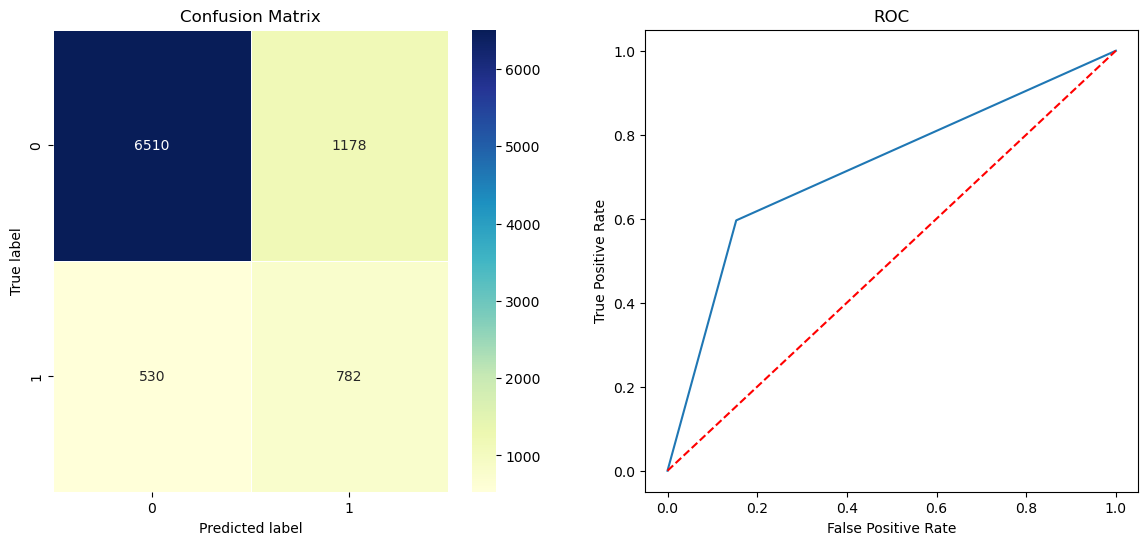

Wall time: 2.93 s


In [98]:
%%time
xgc= xgb.XGBClassifier(random_state=152)
xgc = xgc.fit(X_SMOTE_train, y_SMOTE_train)
Acc_mat_xgc = helper(xgc,X_SMOTE_train, y_SMOTE_train,xtest,ytest)

In [99]:
train_pred = xgc.predict(X_SMOTE_train)
test_pred = xgc.predict(xtest)

In [100]:
xg = roc_auc_score(test_pred,ytest)
print('AUC Score:',xg)

AUC Score: 0.7214053894571204


In [101]:
xg_as=accuracy_score(test_pred,ytest)
print("Accuracy Score:", xg_as)

Accuracy Score: 0.8102222222222222


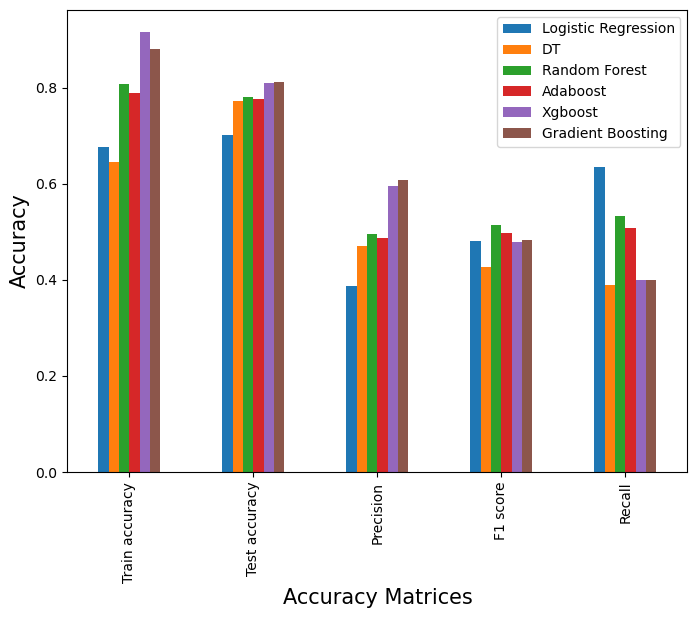

In [104]:
plot1=pd.DataFrame([Acc_mat_lgr,Acc_mat_dt,Acc_mat_rfc,Acc_mat_adc,Acc_mat_xgc,Acc_mat_gbc], index=['Logistic Regression','DT','Random Forest','Adaboost','Xgboost','Gradient Boosting']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Accuracy Matrices",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

## Base Models Conclusion

In [105]:
base_models=['Decision tree Classifier','Random Forest Classifier',
           'AdaBoost Classifier','Gradient Boosting Classifier',  'XGBoost Classifier', 
           'Logistic Regression']
auc_score =[dtc,rf,adc,log,gbc,xg]

accuracy_score=[dtc_as,rf_as,adc_as,log_as,gbc_as,xg_as]

base_models_conclusion = pd.DataFrame({'Models':base_models,"AUC":auc_score,"Accuracy":accuracy_score})

In [106]:
base_models_conclusion

Models       AUC  Accuracy
0      Decision tree Classifier  0.654304  0.771667
1      Random Forest Classifier  0.691013  0.780111
2           AdaBoost Classifier  0.679834  0.776444
3  Gradient Boosting Classifier  0.677829  0.701889
4            XGBoost Classifier  0.727573  0.813111
5           Logistic Regression  0.721405  0.810222

From the above Models we found the top 3 models with highest accuracy & AUC

1.AdaBoost Classifier	

2.XGBoost Classifier	

3.Logistic Regression	

We will perform grid search for these three models

## Grid Search

### Model1 :AdaBoostClassifier Classifier

In [111]:
ad_clf =AdaBoostClassifier()
tree_param = [{"n_estimators": [10,50,100,500,100],
               'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
               'algorithm': ['SAMME','SAMME.R']
             }]
ad_cv = GridSearchCV(ad_clf,param_grid= tree_param, refit=True,scoring='roc_auc',cv=10, verbose=2)

ad_cv.fit(X_SMOTE_train, y_SMOTE_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   5.5s
[CV] END algo

[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=100; total time=  10.6s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=10; total time=   1.0s
[CV] END a

[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=  10.6s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME,

[CV] END algorithm=SAMME.R, learning_rate=0.0001, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.0001, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME.R, learning_rate=0.0001, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.0001, n_estimators=100; total time=  10.8s
[CV] END algorithm=SAMME.R, learning_rate=0.0001, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=0.001, n_esti

[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  11.2s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.8s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.8s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.7s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  10.8s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=  11.0s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   1.1s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total t

[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=  11.0s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                          'n_estimators': [10, 50, 100, 500, 100]}],
             scoring='roc_auc', verbose=2)

In [125]:
ad_clf= AdaBoostClassifier(**ad_cv.best_params_)
ad_clf.fit(X_SMOTE_train, y_SMOTE_train)
ypred_train = ad_clf.predict(X_SMOTE_train)
ypred_test = ad_clf.predict(xtest)

auc_train_dt = roc_auc_score(y_SMOTE_train,ypred_train)
auc_test_dt = roc_auc_score(ytest,ypred_test)


print('AUC score for AdaBoost Classifier training set is:', auc_train_dt)
print('AUC score for AdaBoost Classifier test set is:', auc_test_dt)

AUC score for AdaBoost Classifier training set is: 0.8164052928203872
AUC score for AdaBoost Classifier test set is: 0.6707560296846011


### Model2:XGBoost Classifier

In [116]:
xg_clf=xgb.XGBClassifier(objective= 'binary:logistic',
    nthread=4,
    seed=42)

param ={'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]}

xg_cv = GridSearchCV(xg_clf,param_grid= param, scoring='roc_auc',cv=5, verbose=2)

xg_cv.fit(X_SMOTE_train, y_SMOTE_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   1.5s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   1.8s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   1.8s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   2.4s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   2.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   2.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   2.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   3.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   3.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   3.1s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=60; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=60; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   2.3s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   3.5s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   5.8s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   4.8s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   4.6s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   5.6s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   6.1s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   7.1s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   2.5s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   3.0s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   2.8s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   2.7s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   3.0s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   3.5s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   3.8s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   3.5s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   3.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   4.0s
[CV] END ..learning_rate=0.0

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=2)

In [124]:
xg_clf= xgb.XGBClassifier(**xg_cv.best_params_)
xg_clf.fit(X_SMOTE_train, y_SMOTE_train)
ypred_train_xg = xg_clf.predict(X_SMOTE_train)
ypred_test_xg = xg_clf.predict(xtest)

auc_train_xg = roc_auc_score(y_SMOTE_train,ypred_train_xg)
auc_test_xg = roc_auc_score(ytest,ypred_test_xg)


print('AUC score for XGBClassifier Classifier training set is:', auc_train_xg)
print('AUC score for XGBClassifier Classifier test set is:', auc_test_xg)

AUC score for XGBClassifier Classifier training set is: 0.9567814261210488
AUC score for XGBClassifier Classifier test set is: 0.6560035946196661


### Model3: Logistic Regression.

In [118]:
lr_clf = LogisticRegression()

param = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

lr_cv = GridSearchCV(lr_clf,param_grid= param, scoring='roc_auc',cv=5, verbose=2)

lr_cv.fit(X_SMOTE_train, y_SMOTE_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........................................penalty=l2; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........................................penalty=l2; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........................................penalty=l2; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........................................penalty=l2; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........................................penalty=l2; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ................................................C=1; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ................................................C=1; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ................................................C=1; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ................................................C=1; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ................................................C=1; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............................................C=10; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............................................C=10; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............................................C=10; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............................................C=10; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............................................C=10; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............................................C=100; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............................................C=100; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............................................C=100; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............................................C=100; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............................................C=100; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............................................C=1000; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............................................C=1000; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............................................C=1000; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............................................C=1000; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tra

[CV] END .............................................C=1000; total time=   0.2s


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='roc_auc', verbose=2)

In [126]:
lr_clf= LogisticRegression(**lr_cv.best_params_)
lr_clf.fit(X_SMOTE_train, y_SMOTE_train)
ypred_train_lr = lr_clf.predict(X_SMOTE_train)
ypred_test_lr = lr_clf.predict(xtest)

auc_train_lr = roc_auc_score(y_SMOTE_train,ypred_train_lr)
auc_test_lr = roc_auc_score(ytest,ypred_test_lr)


print('AUC score for LogisticRegression training set is:', auc_train_lr)
print('AUC score for LogisticRegression test set is:', auc_test_lr)

AUC score for LogisticRegression training set is: 0.6751715265866209
AUC score for LogisticRegression test set is: 0.6780278872912802


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Selecting Models With Highest Accuracy

In [127]:
models=['AdaBoostClassifier','XGBoost Classifier','Logistic Regression',]

train =[auc_train_dt,auc_train_xg, auc_train_lr,]

test=[auc_test_dt, auc_test_xg, auc_test_lr,]

model_score = pd.DataFrame({'Model':models,'Train_set':train,'Test_set':test})

model_score

Model  Train_set  Test_set
0   AdaBoostClassifier   0.816405  0.670756
1   XGBoost Classifier   0.956781  0.656004
2  Logistic Regression   0.675172  0.678028

In [128]:
auc_max = model_score['Test_set'].max()
idx = model_score['Test_set'].idxmax()
model_max = model_score.iloc[idx,0]

print("The best model is: ", model_max, ", with an AUC score of", auc_max)

The best model is:  Logistic Regression , with an AUC score of 0.6780278872912802


In [129]:
model = lr_clf.fit(X_SMOTE_train, y_SMOTE_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [130]:
import pickle

In [131]:
print('Model score:', model.score(xtest, ytest))
pickle.dump(model, open('CCmodel.pkl', 'wb'))
                                        

Model score: 0.695


In [132]:
loaded_model = pickle.load(open('CCmodel.pkl', 'rb'))                 
print('Loaded model score:', loaded_model.score(xtest, ytest))

Loaded model score: 0.695
